In [ ]:
!pip install Pillow -U

Requirement already up-to-date: Pillow in /usr/local/lib/python3.7/dist-packages (8.2.0)


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%matplotlib inline

# install pillow
# !pip install Pillow -U

# download and unzip dataset o train
!wget http://images.cocodataset.org/zips/train2014.zip
!mkdir train
%cd /content/train
!unzip -qq /content/train2014.zip
%cd ..

#download model
!wget https://web.eecs.umich.edu/~justincj/models/vgg16-00b39a1b.pth
  
# download helper code
!wget https://raw.githubusercontent.com/iamRusty/fast-neural-style-pytorch/master/transformer.py
!wget https://raw.githubusercontent.com/iamRusty/fast-neural-style-pytorch/master/utils.py
!wget https://raw.githubusercontent.com/iamRusty/fast-neural-style-pytorch/master/vgg.py

# download style image  
# !wget https://raw.githubusercontent.com/iamRusty/fast-neural-style-pytorch/master/images/mosaic.jpg

--2021-06-19 04:54:19--  https://web.eecs.umich.edu/~justincj/models/vgg16-00b39a1b.pth
Resolving web.eecs.umich.edu (web.eecs.umich.edu)... 141.212.113.214
Connecting to web.eecs.umich.edu (web.eecs.umich.edu)|141.212.113.214|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 553451520 (528M) [application/x-tar]
Saving to: ‘vgg16-00b39a1b.pth’

vgg16-00b39a1b.pth  100%[===================>] 527.81M  56.1MB/s    in 10s     

2021-06-19 04:54:30 (52.6 MB/s) - ‘vgg16-00b39a1b.pth’ saved [553451520/553451520]

--2021-06-19 04:54:30--  https://raw.githubusercontent.com/iamRusty/fast-neural-style-pytorch/master/transformer.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4660 (4.6K) [text/plain]
Saving to: ‘transformer.py’

transformer.py

In [ ]:
# !unzip train2014.zip


In [ ]:
!unzip /content/drive/MyDrive/DATASET/train2014.zip

Streaming output truncated to the last 5000 lines.
 extracting: train2014/COCO_train2014_000000408557.jpg  
 extracting: train2014/COCO_train2014_000000013714.jpg  
 extracting: train2014/COCO_train2014_000000194043.jpg  
 extracting: train2014/COCO_train2014_000000219859.jpg  
 extracting: train2014/COCO_train2014_000000278135.jpg  
 extracting: train2014/COCO_train2014_000000141015.jpg  
 extracting: train2014/COCO_train2014_000000280923.jpg  
 extracting: train2014/COCO_train2014_000000200024.jpg  
 extracting: train2014/COCO_train2014_000000435713.jpg  
 extracting: train2014/COCO_train2014_000000249993.jpg  
 extracting: train2014/COCO_train2014_000000424160.jpg  
 extracting: train2014/COCO_train2014_000000142761.jpg  
 extracting: train2014/COCO_train2014_000000532668.jpg  
 extracting: train2014/COCO_train2014_000000564904.jpg  
 extracting: train2014/COCO_train2014_000000346384.jpg  
 extracting: train2014/COCO_train2014_000000560934.jpg  
 extracting: train2014/COCO_train2014

In [ ]:
import PIL
from PIL import Image
import matplotlib.pyplot as plt
import os
import cv2
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
import random
import numpy as np
import time
import vgg
import transformer
import utils  

In [ ]:
# GLOBAL SETTINGS
TRAIN_IMAGE_SIZE = 256
DATASET_PATH = "/content/train"
# DATASET_PATH = '/content/1'
NUM_EPOCHS = 1
STYLE_IMAGE_PATH = "/content/stars.png"
BATCH_SIZE = 4 
CONTENT_WEIGHT = 17
STYLE_WEIGHT = 50
TV_WEIGHT = 1e-6 
ADAM_LR = 0.001
SAVE_MODEL_PATH = "/content/drive/MyDrive/temp/model"
SAVE_IMAGE_PATH = "/content/drive/MyDrive/temp/image_result"
SAVE_MODEL_EVERY = 500 # 2,000 Images with batch size 4
SEED = 35 

In [ ]:
import os
path  = '/content/train'
x = os.listdir(path)

In [ ]:
x

['1']

In [ ]:
os.removedirs('.ipynb_checkpoints/')

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


========Epoch 1/2========
========Iteration 1/20696========
	Content Loss:	2917063.75
	Style Loss:	16471748.00
	Total Loss:	19388812.00
Time elapsed:	0.4072082042694092 seconds
Saved TransformerNetwork checkpoint file at /content/drive/MyDrive/temp/modelcheckpoint_0.pth


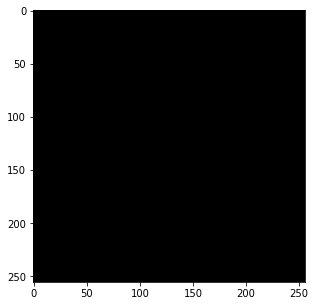

Saved sample tranformed image at /content/drive/MyDrive/temp/image_resultsample0_0.png
========Iteration 501/20696========
	Content Loss:	1829708.50
	Style Loss:	1475544.12
	Total Loss:	3305254.09
Time elapsed:	116.44939970970154 seconds
Saved TransformerNetwork checkpoint file at /content/drive/MyDrive/temp/modelcheckpoint_500.pth


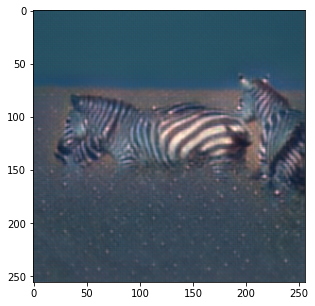

Saved sample tranformed image at /content/drive/MyDrive/temp/image_resultsample0_500.png
========Iteration 1001/20696========
	Content Loss:	1549464.12
	Style Loss:	939062.62
	Total Loss:	2488526.64
Time elapsed:	235.92469382286072 seconds
Saved TransformerNetwork checkpoint file at /content/drive/MyDrive/temp/modelcheckpoint_1000.pth


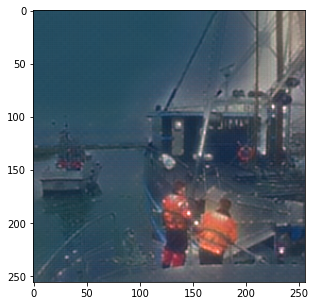

Saved sample tranformed image at /content/drive/MyDrive/temp/image_resultsample0_1000.png
========Iteration 1501/20696========
	Content Loss:	1425396.75
	Style Loss:	754302.81
	Total Loss:	2179699.62
Time elapsed:	355.2410910129547 seconds
Saved TransformerNetwork checkpoint file at /content/drive/MyDrive/temp/modelcheckpoint_1500.pth


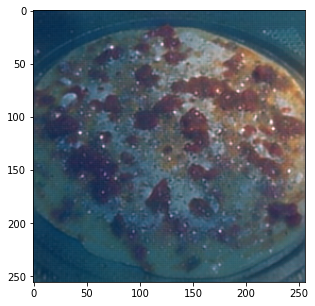

Saved sample tranformed image at /content/drive/MyDrive/temp/image_resultsample0_1500.png
========Iteration 2001/20696========
	Content Loss:	1351541.00
	Style Loss:	659007.19
	Total Loss:	2010547.67
Time elapsed:	474.51939964294434 seconds
Saved TransformerNetwork checkpoint file at /content/drive/MyDrive/temp/modelcheckpoint_2000.pth


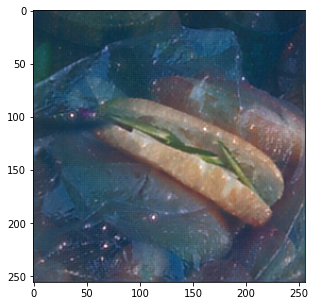

Saved sample tranformed image at /content/drive/MyDrive/temp/image_resultsample0_2000.png
========Iteration 2501/20696========
	Content Loss:	1297684.62
	Style Loss:	599321.00
	Total Loss:	1897006.43
Time elapsed:	593.8178412914276 seconds
Saved TransformerNetwork checkpoint file at /content/drive/MyDrive/temp/modelcheckpoint_2500.pth


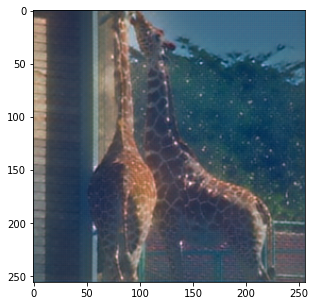

Saved sample tranformed image at /content/drive/MyDrive/temp/image_resultsample0_2500.png
========Iteration 3001/20696========
	Content Loss:	1262628.88
	Style Loss:	559409.62
	Total Loss:	1822039.75
Time elapsed:	713.0201163291931 seconds
Saved TransformerNetwork checkpoint file at /content/drive/MyDrive/temp/modelcheckpoint_3000.pth


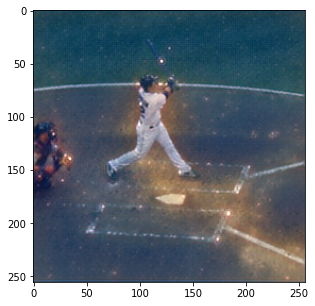

Saved sample tranformed image at /content/drive/MyDrive/temp/image_resultsample0_3000.png
========Iteration 3501/20696========
	Content Loss:	1235079.00
	Style Loss:	530361.19
	Total Loss:	1765440.71
Time elapsed:	832.2836263179779 seconds
Saved TransformerNetwork checkpoint file at /content/drive/MyDrive/temp/modelcheckpoint_3500.pth


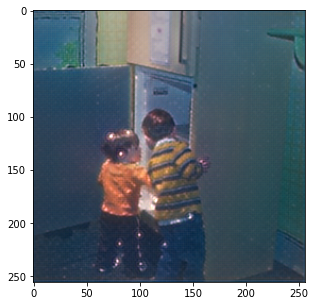

Saved sample tranformed image at /content/drive/MyDrive/temp/image_resultsample0_3500.png
========Iteration 4001/20696========
	Content Loss:	1211923.12
	Style Loss:	507831.62
	Total Loss:	1719756.12
Time elapsed:	951.438325881958 seconds
Saved TransformerNetwork checkpoint file at /content/drive/MyDrive/temp/modelcheckpoint_4000.pth


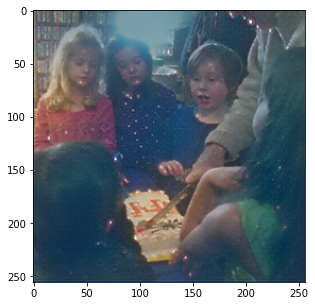

Saved sample tranformed image at /content/drive/MyDrive/temp/image_resultsample0_4000.png
========Iteration 4501/20696========
	Content Loss:	1194482.75
	Style Loss:	490187.50
	Total Loss:	1684672.10
Time elapsed:	1070.664070367813 seconds
Saved TransformerNetwork checkpoint file at /content/drive/MyDrive/temp/modelcheckpoint_4500.pth


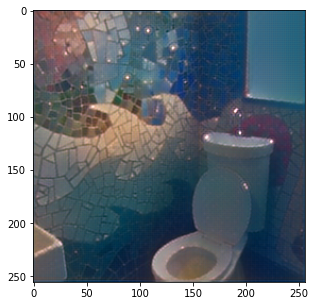

Saved sample tranformed image at /content/drive/MyDrive/temp/image_resultsample0_4500.png
========Iteration 5001/20696========
	Content Loss:	1177400.38
	Style Loss:	475426.12
	Total Loss:	1652827.18
Time elapsed:	1189.6530902385712 seconds
Saved TransformerNetwork checkpoint file at /content/drive/MyDrive/temp/modelcheckpoint_5000.pth


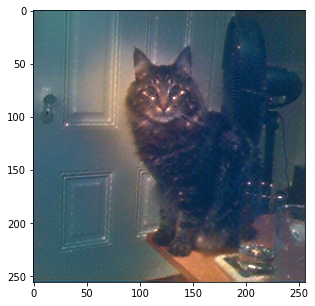

Saved sample tranformed image at /content/drive/MyDrive/temp/image_resultsample0_5000.png
========Iteration 5501/20696========
	Content Loss:	1163958.12
	Style Loss:	463170.69
	Total Loss:	1627128.98
Time elapsed:	1308.821135044098 seconds
Saved TransformerNetwork checkpoint file at /content/drive/MyDrive/temp/modelcheckpoint_5500.pth


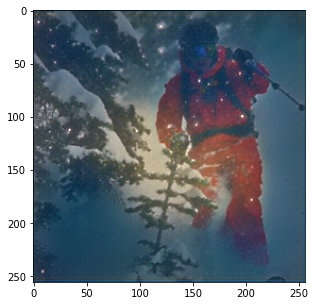

Saved sample tranformed image at /content/drive/MyDrive/temp/image_resultsample0_5500.png
========Iteration 6001/20696========
	Content Loss:	1153572.50
	Style Loss:	453052.88
	Total Loss:	1606625.36
Time elapsed:	1428.3041541576385 seconds
Saved TransformerNetwork checkpoint file at /content/drive/MyDrive/temp/modelcheckpoint_6000.pth


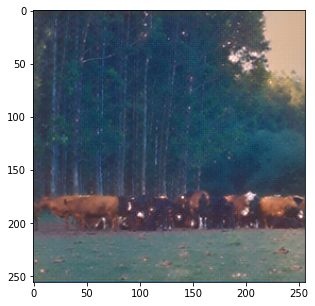

Saved sample tranformed image at /content/drive/MyDrive/temp/image_resultsample0_6000.png
========Iteration 6501/20696========
	Content Loss:	1143214.62
	Style Loss:	444331.56
	Total Loss:	1587545.96
Time elapsed:	1547.3186020851135 seconds
Saved TransformerNetwork checkpoint file at /content/drive/MyDrive/temp/modelcheckpoint_6500.pth


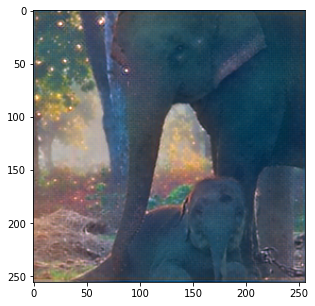

Saved sample tranformed image at /content/drive/MyDrive/temp/image_resultsample0_6500.png
========Iteration 7001/20696========
	Content Loss:	1134404.12
	Style Loss:	436791.44
	Total Loss:	1571194.57
Time elapsed:	1666.492681503296 seconds
Saved TransformerNetwork checkpoint file at /content/drive/MyDrive/temp/modelcheckpoint_7000.pth


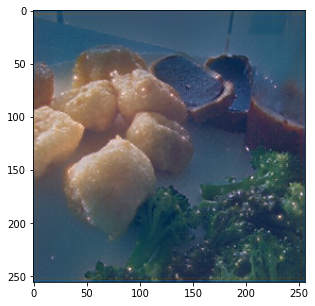

Saved sample tranformed image at /content/drive/MyDrive/temp/image_resultsample0_7000.png
========Iteration 7501/20696========
	Content Loss:	1125313.38
	Style Loss:	429895.56
	Total Loss:	1555208.29
Time elapsed:	1785.8602533340454 seconds
Saved TransformerNetwork checkpoint file at /content/drive/MyDrive/temp/modelcheckpoint_7500.pth


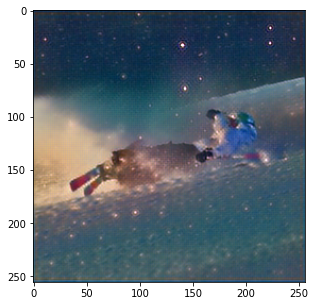

Saved sample tranformed image at /content/drive/MyDrive/temp/image_resultsample0_7500.png
========Iteration 8001/20696========
	Content Loss:	1119085.50
	Style Loss:	424127.47
	Total Loss:	1543210.82
Time elapsed:	1905.2519927024841 seconds
Saved TransformerNetwork checkpoint file at /content/drive/MyDrive/temp/modelcheckpoint_8000.pth


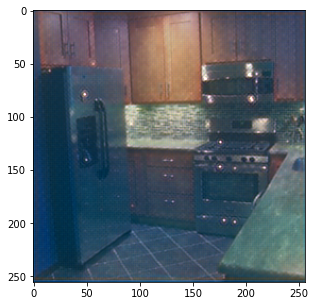

Saved sample tranformed image at /content/drive/MyDrive/temp/image_resultsample0_8000.png
========Iteration 8501/20696========
	Content Loss:	1113087.25
	Style Loss:	418864.22
	Total Loss:	1531948.23
Time elapsed:	2024.6012949943542 seconds
Saved TransformerNetwork checkpoint file at /content/drive/MyDrive/temp/modelcheckpoint_8500.pth


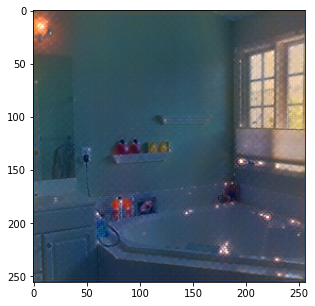

Saved sample tranformed image at /content/drive/MyDrive/temp/image_resultsample0_8500.png
========Iteration 9001/20696========
	Content Loss:	1107942.12
	Style Loss:	414401.84
	Total Loss:	1522340.10
Time elapsed:	2143.9234960079193 seconds
Saved TransformerNetwork checkpoint file at /content/drive/MyDrive/temp/modelcheckpoint_9000.pth


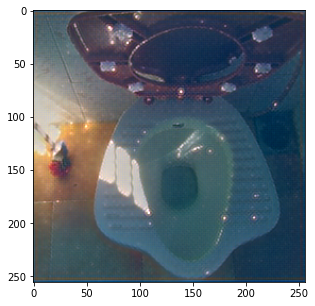

Saved sample tranformed image at /content/drive/MyDrive/temp/image_resultsample0_9000.png
========Iteration 9501/20696========
	Content Loss:	1102135.75
	Style Loss:	409969.81
	Total Loss:	1512101.12
Time elapsed:	2263.303602218628 seconds
Saved TransformerNetwork checkpoint file at /content/drive/MyDrive/temp/modelcheckpoint_9500.pth


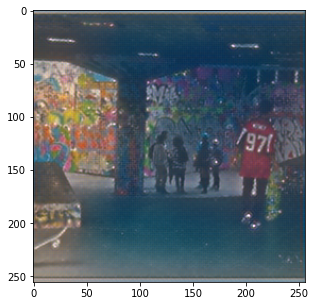

Saved sample tranformed image at /content/drive/MyDrive/temp/image_resultsample0_9500.png
========Iteration 10001/20696========
	Content Loss:	1096597.38
	Style Loss:	405992.56
	Total Loss:	1502586.01
Time elapsed:	2382.7353780269623 seconds
Saved TransformerNetwork checkpoint file at /content/drive/MyDrive/temp/modelcheckpoint_10000.pth


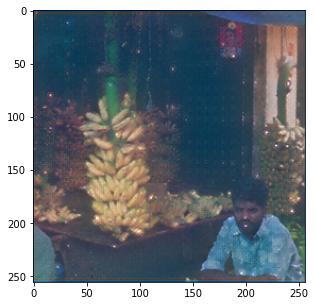

Saved sample tranformed image at /content/drive/MyDrive/temp/image_resultsample0_10000.png
========Iteration 10501/20696========
	Content Loss:	1092569.88
	Style Loss:	402480.16
	Total Loss:	1495046.11
Time elapsed:	2502.0388724803925 seconds
Saved TransformerNetwork checkpoint file at /content/drive/MyDrive/temp/modelcheckpoint_10500.pth


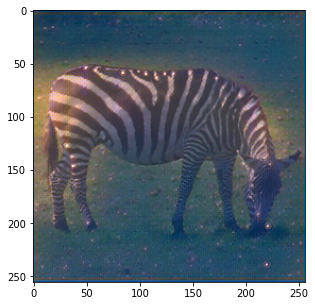

Saved sample tranformed image at /content/drive/MyDrive/temp/image_resultsample0_10500.png
========Iteration 11001/20696========
	Content Loss:	1089058.12
	Style Loss:	399357.69
	Total Loss:	1488412.85
Time elapsed:	2621.431003808975 seconds
Saved TransformerNetwork checkpoint file at /content/drive/MyDrive/temp/modelcheckpoint_11000.pth


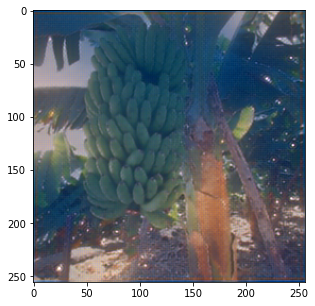

Saved sample tranformed image at /content/drive/MyDrive/temp/image_resultsample0_11000.png
========Iteration 11501/20696========
	Content Loss:	1086077.62
	Style Loss:	396483.47
	Total Loss:	1482559.10
Time elapsed:	2740.7698335647583 seconds
Saved TransformerNetwork checkpoint file at /content/drive/MyDrive/temp/modelcheckpoint_11500.pth


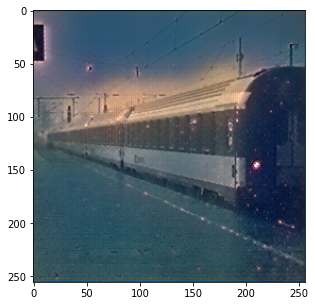

Saved sample tranformed image at /content/drive/MyDrive/temp/image_resultsample0_11500.png
========Iteration 12001/20696========
	Content Loss:	1082441.00
	Style Loss:	393663.12
	Total Loss:	1476101.02
Time elapsed:	2860.080125808716 seconds
Saved TransformerNetwork checkpoint file at /content/drive/MyDrive/temp/modelcheckpoint_12000.pth


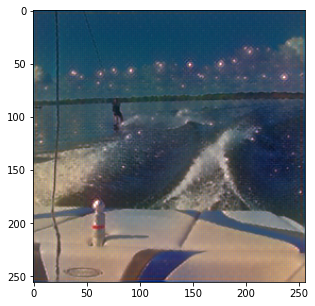

Saved sample tranformed image at /content/drive/MyDrive/temp/image_resultsample0_12000.png
========Iteration 12501/20696========
	Content Loss:	1078945.62
	Style Loss:	390979.25
	Total Loss:	1469922.19
Time elapsed:	2979.4765989780426 seconds
Saved TransformerNetwork checkpoint file at /content/drive/MyDrive/temp/modelcheckpoint_12500.pth


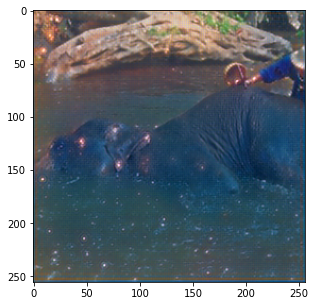

Saved sample tranformed image at /content/drive/MyDrive/temp/image_resultsample0_12500.png
========Iteration 13001/20696========
	Content Loss:	1075974.62
	Style Loss:	388612.81
	Total Loss:	1464584.80
Time elapsed:	3098.823761701584 seconds
Saved TransformerNetwork checkpoint file at /content/drive/MyDrive/temp/modelcheckpoint_13000.pth


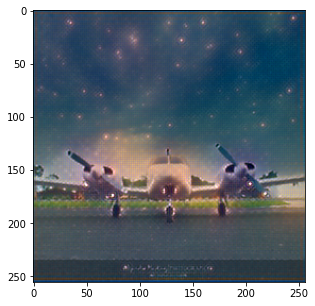

Saved sample tranformed image at /content/drive/MyDrive/temp/image_resultsample0_13000.png
========Iteration 13501/20696========
	Content Loss:	1073440.00
	Style Loss:	386386.84
	Total Loss:	1459824.85
Time elapsed:	3218.1251018047333 seconds
Saved TransformerNetwork checkpoint file at /content/drive/MyDrive/temp/modelcheckpoint_13500.pth


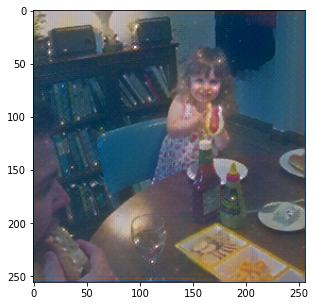

Saved sample tranformed image at /content/drive/MyDrive/temp/image_resultsample0_13500.png
========Iteration 14001/20696========
	Content Loss:	1070864.50
	Style Loss:	384364.66
	Total Loss:	1455227.90
Time elapsed:	3337.3215177059174 seconds
Saved TransformerNetwork checkpoint file at /content/drive/MyDrive/temp/modelcheckpoint_14000.pth


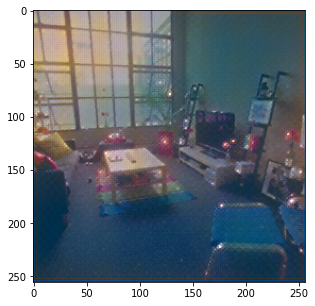

Saved sample tranformed image at /content/drive/MyDrive/temp/image_resultsample0_14000.png
========Iteration 14501/20696========
	Content Loss:	1068604.88
	Style Loss:	382471.59
	Total Loss:	1451074.99
Time elapsed:	3456.559549808502 seconds
Saved TransformerNetwork checkpoint file at /content/drive/MyDrive/temp/modelcheckpoint_14500.pth


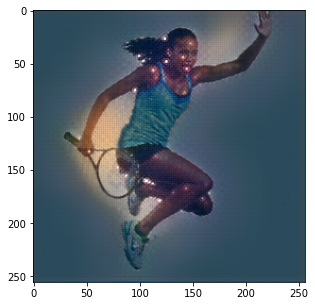

Saved sample tranformed image at /content/drive/MyDrive/temp/image_resultsample0_14500.png
========Iteration 15001/20696========
	Content Loss:	1067566.50
	Style Loss:	380905.41
	Total Loss:	1448469.71
Time elapsed:	3575.8889722824097 seconds
Saved TransformerNetwork checkpoint file at /content/drive/MyDrive/temp/modelcheckpoint_15000.pth


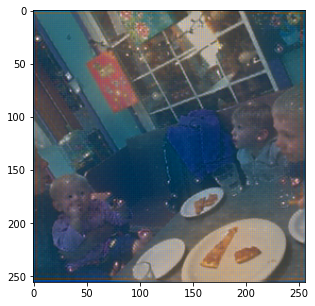

Saved sample tranformed image at /content/drive/MyDrive/temp/image_resultsample0_15000.png
========Iteration 15501/20696========
	Content Loss:	1065520.88
	Style Loss:	379221.16
	Total Loss:	1444739.84
Time elapsed:	3695.2683885097504 seconds
Saved TransformerNetwork checkpoint file at /content/drive/MyDrive/temp/modelcheckpoint_15500.pth


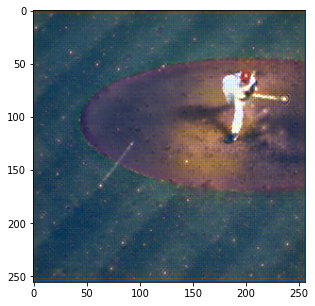

Saved sample tranformed image at /content/drive/MyDrive/temp/image_resultsample0_15500.png
========Iteration 16001/20696========
	Content Loss:	1063643.75
	Style Loss:	377654.25
	Total Loss:	1441296.32
Time elapsed:	3814.9503104686737 seconds
Saved TransformerNetwork checkpoint file at /content/drive/MyDrive/temp/modelcheckpoint_16000.pth


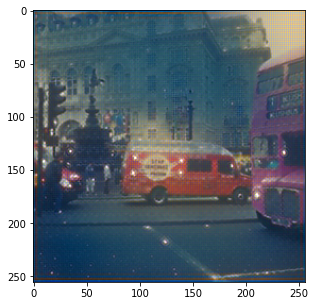

Saved sample tranformed image at /content/drive/MyDrive/temp/image_resultsample0_16000.png
========Iteration 16501/20696========
	Content Loss:	1061609.12
	Style Loss:	376157.94
	Total Loss:	1437766.33
Time elapsed:	3934.1805815696716 seconds
Saved TransformerNetwork checkpoint file at /content/drive/MyDrive/temp/modelcheckpoint_16500.pth


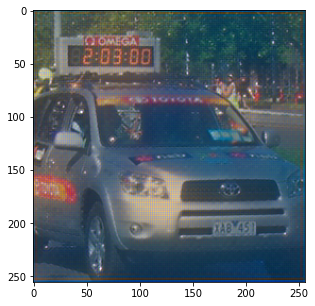

Saved sample tranformed image at /content/drive/MyDrive/temp/image_resultsample0_16500.png
========Iteration 17001/20696========
	Content Loss:	1059813.50
	Style Loss:	374764.38
	Total Loss:	1434577.43
Time elapsed:	4053.464584350586 seconds
Saved TransformerNetwork checkpoint file at /content/drive/MyDrive/temp/modelcheckpoint_17000.pth


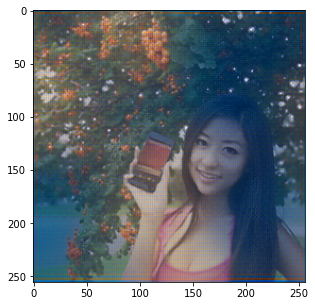

Saved sample tranformed image at /content/drive/MyDrive/temp/image_resultsample0_17000.png
========Iteration 17501/20696========
	Content Loss:	1058119.38
	Style Loss:	373437.56
	Total Loss:	1431555.50
Time elapsed:	4172.84152173996 seconds
Saved TransformerNetwork checkpoint file at /content/drive/MyDrive/temp/modelcheckpoint_17500.pth


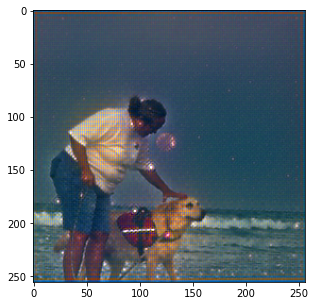

Saved sample tranformed image at /content/drive/MyDrive/temp/image_resultsample0_17500.png
========Iteration 18001/20696========
	Content Loss:	1055721.50
	Style Loss:	372025.81
	Total Loss:	1427744.53
Time elapsed:	4292.005753278732 seconds
Saved TransformerNetwork checkpoint file at /content/drive/MyDrive/temp/modelcheckpoint_18000.pth


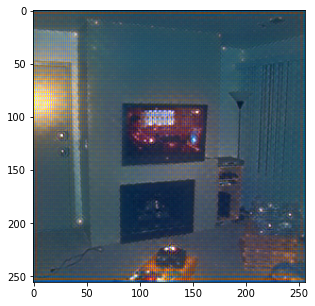

Saved sample tranformed image at /content/drive/MyDrive/temp/image_resultsample0_18000.png
========Iteration 18501/20696========
	Content Loss:	1053814.00
	Style Loss:	370719.09
	Total Loss:	1424530.13
Time elapsed:	4411.237835884094 seconds
Saved TransformerNetwork checkpoint file at /content/drive/MyDrive/temp/modelcheckpoint_18500.pth


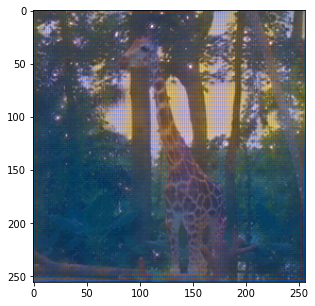

Saved sample tranformed image at /content/drive/MyDrive/temp/image_resultsample0_18500.png
========Iteration 19001/20696========
	Content Loss:	1051886.00
	Style Loss:	369449.62
	Total Loss:	1421332.62
Time elapsed:	4530.529318332672 seconds
Saved TransformerNetwork checkpoint file at /content/drive/MyDrive/temp/modelcheckpoint_19000.pth


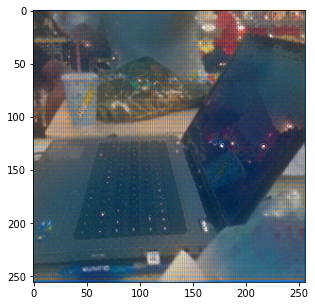

Saved sample tranformed image at /content/drive/MyDrive/temp/image_resultsample0_19000.png
========Iteration 19501/20696========
	Content Loss:	1049437.62
	Style Loss:	368108.25
	Total Loss:	1417543.22
Time elapsed:	4649.759319782257 seconds
Saved TransformerNetwork checkpoint file at /content/drive/MyDrive/temp/modelcheckpoint_19500.pth


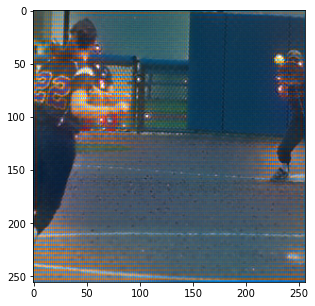

Saved sample tranformed image at /content/drive/MyDrive/temp/image_resultsample0_19500.png
========Iteration 20001/20696========
	Content Loss:	1048258.56
	Style Loss:	367028.22
	Total Loss:	1415284.21
Time elapsed:	4768.995979070663 seconds
Saved TransformerNetwork checkpoint file at /content/drive/MyDrive/temp/modelcheckpoint_20000.pth


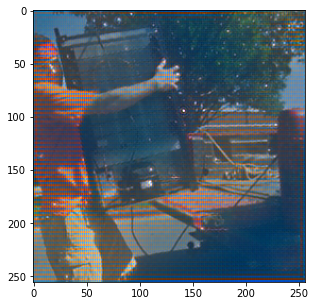

Saved sample tranformed image at /content/drive/MyDrive/temp/image_resultsample0_20000.png
========Iteration 20501/20696========
	Content Loss:	1047133.94
	Style Loss:	366009.03
	Total Loss:	1413140.03
Time elapsed:	4888.315643072128 seconds
Saved TransformerNetwork checkpoint file at /content/drive/MyDrive/temp/modelcheckpoint_20500.pth


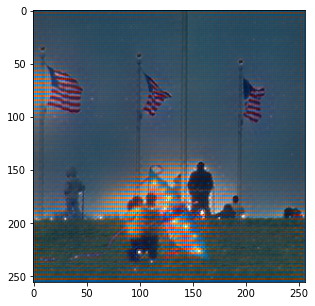

Saved sample tranformed image at /content/drive/MyDrive/temp/image_resultsample0_20500.png
========Iteration 20696/20696========
	Content Loss:	1046648.50
	Style Loss:	365626.78
	Total Loss:	1412272.68
Time elapsed:	4935.003952503204 seconds
Saved TransformerNetwork checkpoint file at /content/drive/MyDrive/temp/modelcheckpoint_20695.pth


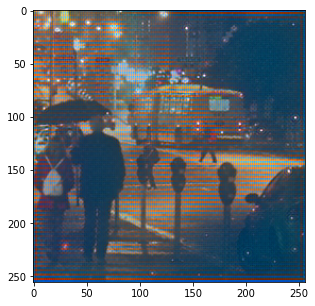

Saved sample tranformed image at /content/drive/MyDrive/temp/image_resultsample0_20695.png
Done Training the Transformer Network!
Training Time: 4935.248861074448 seconds
========Content Loss========
[19388812.0, 3305254.0865768464, 2488526.643106893, 2179699.6189207197, 2010547.6653235883, 1897006.4261795282, 1822039.745793069, 1765440.7100292773, 1719756.1181579605, 1684672.1002416129, 1652827.1849380124, 1627128.9766178876, 1606625.359492168, 1587545.9564778495, 1571194.5679367234, 1555208.2901779762, 1543210.8181008624, 1531948.2309287142, 1522340.103134374, 1512101.1188756446, 1502586.0134424057, 1495046.1137689268, 1488412.851235115, 1482559.098833797, 1476101.0234147154, 1469922.1949044077, 1464584.8039525806, 1459824.8523396414, 1455227.9038461538, 1451074.9850182745, 1448469.7053321446, 1444739.8364944197, 1441296.316472408, 1437766.3275028786, 1434577.4261256692, 1431555.498107251, 1427744.530189295, 1424530.126226285, 1421332.6201449924, 1417543.2152005024, 1415284.213851807

In [ ]:
def train():
    # Seeds
    torch.manual_seed(SEED)
    torch.cuda.manual_seed(SEED)
    np.random.seed(SEED)
    random.seed(SEED)

    # Device
    device = ("cuda" if torch.cuda.is_available() else "cpu")

    # Dataset and Dataloader
    transform = transforms.Compose([
        transforms.Resize(TRAIN_IMAGE_SIZE),
        transforms.CenterCrop(TRAIN_IMAGE_SIZE),
        transforms.ToTensor(),
        transforms.Lambda(lambda x: x.mul(255))
    ])
    train_dataset = datasets.ImageFolder(DATASET_PATH, transform=transform)
    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)

    # Load networks
    TransformerNetwork = transformer.TransformerNetwork().to(device)
    VGG = vgg.VGG16('/content/vgg16-00b39a1b.pth').to(device)

    # Get Style Features
    imagenet_neg_mean = torch.tensor([-103.939, -116.779, -123.68], dtype=torch.float32).reshape(1,3,1,1).to(device)
    imagenet_mean = torch.tensor([103.939, 116.779, 123.68], dtype=torch.float32).reshape(1,3,1,1).to(device)
    style_image = utils.load_image(STYLE_IMAGE_PATH)
    style_tensor = utils.itot(style_image).to(device)
    style_tensor = style_tensor.add(imagenet_neg_mean)
    B, C, H, W = style_tensor.shape
    style_features = VGG(style_tensor.expand([BATCH_SIZE, C, H, W]))
    style_gram = {}
    for key, value in style_features.items():
        style_gram[key] = utils.gram(value)

    # Optimizer settings
    optimizer = optim.Adam(TransformerNetwork.parameters(), lr=ADAM_LR)

    # Loss trackers
    content_loss_history = []
    style_loss_history = []
    total_loss_history = []
    batch_content_loss_sum = 0
    batch_style_loss_sum = 0
    batch_total_loss_sum = 0

    # Optimization/Training Loop
    batch_count = 1
    start_time = time.time()
    for epoch in range (1, NUM_EPOCHS+1):
        print("========Epoch {}/{}========".format(epoch, NUM_EPOCHS+1))
        for batch_id, (content_batch, _) in enumerate(train_loader):
            # Current Batch size in case of odd batches
            curr_batch_size = content_batch.shape[0]
            
            # Zero-out Gradients
            optimizer.zero_grad()

            # Generate images and get features
            content_batch = content_batch[:,[2,1,0]].to(device)
            generated_batch = TransformerNetwork(content_batch)
            content_features = VGG(content_batch.add(imagenet_neg_mean))
            generated_features = VGG(generated_batch.add(imagenet_neg_mean))

            # Content Loss
            MSELoss = nn.MSELoss().to(device)
            content_loss = CONTENT_WEIGHT * MSELoss(content_features['relu2_2'], generated_features['relu2_2'])            
            batch_content_loss_sum += content_loss

            # Style Loss
            style_loss = 0
            for key, value in generated_features.items():
                s_loss = MSELoss(utils.gram(value), style_gram[key][:curr_batch_size])
                style_loss += s_loss
            style_loss *= STYLE_WEIGHT
            batch_style_loss_sum += style_loss

            # Total Loss
            total_loss = content_loss + style_loss
            batch_total_loss_sum += total_loss.item()

            # Backprop and Weight Update
            total_loss.backward()
            optimizer.step()

            # Save Model and Print Losses
            if (((batch_count-1)%SAVE_MODEL_EVERY == 0) or (batch_count==NUM_EPOCHS*len(train_loader))):
                # Print Losses
                print("========Iteration {}/{}========".format(batch_count, NUM_EPOCHS*len(train_loader)))
                print("\tContent Loss:\t{:.2f}".format(batch_content_loss_sum/batch_count))
                print("\tStyle Loss:\t{:.2f}".format(batch_style_loss_sum/batch_count))
                print("\tTotal Loss:\t{:.2f}".format(batch_total_loss_sum/batch_count))
                print("Time elapsed:\t{} seconds".format(time.time()-start_time))

                # Save Model
                checkpoint_path = SAVE_MODEL_PATH + "checkpoint_" + str(batch_count-1) + ".pth"
                torch.save(TransformerNetwork.state_dict(), checkpoint_path)
                print("Saved TransformerNetwork checkpoint file at {}".format(checkpoint_path))

                # Save sample generated image
                sample_tensor = generated_batch[0].clone().detach().unsqueeze(dim=0)
                sample_image = utils.ttoi(sample_tensor.clone().detach())
                sample_image_path = SAVE_IMAGE_PATH + "sample0_" + str(batch_count-1) + ".png"
                utils.saveimg(sample_image, sample_image_path)
                utils.show(sample_image)
                print("Saved sample tranformed image at {}".format(sample_image_path))

                # Save loss histories
                content_loss_history.append(batch_total_loss_sum/batch_count)
                style_loss_history.append(batch_style_loss_sum/batch_count)
                total_loss_history.append(batch_total_loss_sum/batch_count)

            # Iterate Batch Counter
            batch_count+=1

    stop_time = time.time()
    # Print loss histories
    print("Done Training the Transformer Network!")
    print("Training Time: {} seconds".format(stop_time-start_time))
    print("========Content Loss========")
    print(content_loss_history) 
    print("========Style Loss========")
    print(style_loss_history) 
    print("========Total Loss========")
    print(total_loss_history) 

    # Save TransformerNetwork weights
    TransformerNetwork.eval()
    TransformerNetwork.cpu()
    final_path = SAVE_MODEL_PATH + "transformer_weight.pth"
    print("Saving TransformerNetwork weights at {}".format(final_path))
    torch.save(TransformerNetwork.state_dict(), final_path)
    print("Done saving final model")

train()

In [ ]:
!git clone https://github.com/rrmina/fast-neural-style-pytorch

Cloning into 'fast-neural-style-pytorch'...
remote: Enumerating objects: 288, done.
remote: Total 288 (delta 0), reused 0 (delta 0), pack-reused 288
Receiving objects: 100% (288/288), 260.96 MiB | 38.27 MiB/s, done.
Resolving deltas: 100% (136/136), done.
Checking out files: 100% (45/45), done.


In [ ]:
cd fast-neural-style-pytorch/

/content/fast-neural-style-pytorch


In [ ]:
!python stylize.py


Stylize Image~ Press Ctrl+C and Enter to close the program
Enter the image path: /content/drive/MyDrive/NST/content/logo_uit.jpg
Transfer Time: 0.10043072700500488
<Figure size 1000x500 with 1 Axes>
Stylize Image~ Press Ctrl+C and Enter to close the program
Enter the image path: /content/drive/MyDrive/NST/content/brad_pitt.jpg
Transfer Time: 0.30181336402893066
<Figure size 1000x500 with 1 Axes>
Stylize Image~ Press Ctrl+C and Enter to close the program
Enter the image path: /content/drive/MyDrive/NST/content/chicago.jpg
Transfer Time: 0.07257246971130371
<Figure size 1000x500 with 1 Axes>
Stylize Image~ Press Ctrl+C and Enter to close the program
Enter the image path: /content/drive/MyDrive/NST/content/UIT.jpg
Transfer Time: 0.09945797920227051
<Figure size 1000x500 with 1 Axes>
Stylize Image~ Press Ctrl+C and Enter to close the program
Enter the image path: /content/drive/MyDrive/NST/content/phongcanh.jpg
Transfer Time: 0.2238016128540039
<Figure size 1000x500 with 1 Axes>
Stylize Im